## import modules

In [81]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import requests
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import matplotlib.pyplot as plt

## define model architecture

In [82]:
class ConvNet(nn.Module):
    def __init__(self):
       super(ConvNet, self).__init__()
       self.conv1 = nn.Conv2d(3, 6, 5)
       self.pool = nn.MaxPool2d(2, 2)
       self.conv2 = nn.Conv2d(6, 16, 5)
       self.fc1 = nn.Linear(16 * 5 * 5, 120)
       self.fc2 = nn.Linear(120, 84)
       self.fc3 = nn.Linear(84, 10)
 
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

## define training and inference routines

In [83]:
torch.manual_seed(0)
device = torch.device("cpu")

model = ConvNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

## define optimizer and run training epochs

In [84]:
def train(model, device, train_dataloader, optim, epoch):
    model.train()
    for b_i, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)
        optim.zero_grad()
        pred_prob = model(X)
        loss = criterion(pred_prob, y) # nll is the negative likelihood loss
        loss.backward()
        optim.step()
        if b_i % 100 == 0:
            print('epoch: {} [{}/{} ({:.0f}%)]\t training loss: {:.6f}'.format(
                epoch, b_i * len(X), len(train_dataloader.dataset),
                100. * b_i / len(train_dataloader), loss.item()))


In [85]:
def test(model, device, test_dataloader):
    model.eval()
    loss = 0
    success = 0
    with torch.no_grad():
        for X, y in test_dataloader:
            X, y = X.to(device), y.to(device)
            pred_prob = model(X)
            loss += criterion(pred_prob, y).item()  # loss summed across the batch
            pred = pred_prob.argmax(dim=1, keepdim=True)  # us argmax to get the most likely prediction
            success += pred.eq(y.view_as(pred)).sum().item()

    loss /= len(test_dataloader.dataset)

    print('\nTest dataset: Overall Loss: {:.4f}, Overall Accuracy: {}/{} ({:.0f}%)\n'.format(
        loss, success, len(test_dataloader.dataset),
        100. * success / len(test_dataloader.dataset)))


## create data loaders

In [86]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = datasets.CIFAR10(root='../data', train=True, download=True, transform=transform)
train_dataloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = datasets.CIFAR10(root='../data', train=False, download=True, transform=transform)
test_dataloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


## model training

In [87]:
for epoch in range(1, 10):
    train(model, device, train_dataloader, optimizer, epoch)
    test(model, device, test_dataloader)

ining loss: 1.842358
epoch: 17 [5600/50000 (11%)]	 training loss: 0.521123
epoch: 17 [6000/50000 (12%)]	 training loss: 0.752929
epoch: 17 [6400/50000 (13%)]	 training loss: 0.295212
epoch: 17 [6800/50000 (14%)]	 training loss: 0.190149
epoch: 17 [7200/50000 (14%)]	 training loss: 2.310968
epoch: 17 [7600/50000 (15%)]	 training loss: 0.976244
epoch: 17 [8000/50000 (16%)]	 training loss: 0.938938
epoch: 17 [8400/50000 (17%)]	 training loss: 2.532876
epoch: 17 [8800/50000 (18%)]	 training loss: 1.069721
epoch: 17 [9200/50000 (18%)]	 training loss: 0.019608
epoch: 17 [9600/50000 (19%)]	 training loss: 1.087927
epoch: 17 [10000/50000 (20%)]	 training loss: 0.405770
epoch: 17 [10400/50000 (21%)]	 training loss: 0.803470
epoch: 17 [10800/50000 (22%)]	 training loss: 1.332078
epoch: 17 [11200/50000 (22%)]	 training loss: 0.850006
epoch: 17 [11600/50000 (23%)]	 training loss: 0.316941
epoch: 17 [12000/50000 (24%)]	 training loss: 0.077120
epoch: 17 [12400/50000 (25%)]	 training loss: 0.319265


## run inference on trained model

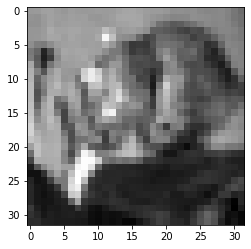

In [88]:
test_samples = enumerate(test_dataloader)
b_i, (sample_data, sample_targets) = next(test_samples)

plt.imshow(sample_data[0][0], cmap='gray', interpolation='none')
plt.show()

In [89]:
print(f"Model prediction is : {model(sample_data).data.max(1)[1][0]}")
print(f"Ground truth is : {sample_targets[0]}")

Model prediction is : 3
Ground truth is : 3
